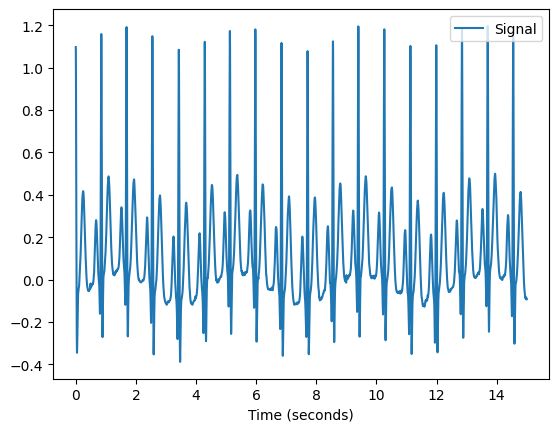

In [47]:
import neurokit2 as nk
import numpy as np

sampling_rate = 1000

ecg = nk.ecg_simulate(duration=15, sampling_rate=sampling_rate)


nk.signal_plot(ecg, sampling_rate=sampling_rate)

In [36]:
signals, info = nk.ecg_process(ecg, sampling_rate=sampling_rate)
# print(signals)
print(len(ecg))

15000


In [44]:
# COMPUTE PR SEGMENT

# Extract the indices where 'ECG_P_Onsets' and 'ECG_R_Onsets' are not zero
p_onsets_indices = np.where(signals['ECG_P_Onsets'] != 0)[0]
r_onsets_indices = np.where(signals['ECG_R_Onsets'] != 0)[0]

# Truncate the longer array to match the length of the shorter one
min_length = min(len(p_onsets_indices), len(r_onsets_indices))
p_onsets_indices = p_onsets_indices[:min_length]
r_onsets_indices = r_onsets_indices[:min_length]

print("PR Intervals (ms):", r_onsets_indices - p_onsets_indices)


[186 175 175 172 173 172 179 177 175 170 183 183 176 164 172 180]


In [45]:
# COMPUTE QRS SEGMENT
r_onsets_indices = np.where(signals['ECG_R_Onsets'] != 0)[0]
r_offsets_indices = np.where(signals['ECG_R_Offsets'] != 0)[0]

# Truncate the longer array to match the length of the shorter one
min_length = min(len(r_onsets_indices), len(r_offsets_indices))
r_onsets_indices = r_onsets_indices[:min_length]
r_offsets_indices = r_offsets_indices[:min_length]

print("QRS Durations (ms):", r_offsets_indices - r_onsets_indices)

QRS Durations (ms): [150 153 155 156 152 153 153 153 150 153 151 151 152 157 153 153]


In [46]:
# COMPUTE ST SEGMENT
r_offsets_indices = np.where(signals['ECG_R_Offsets'] != 0)[0]
t_onsets_indices = np.where(signals['ECG_T_Onsets'] != 0)[0]

# Truncate the longer array to match the length of the shorter one
min_length = min(len(r_offsets_indices), len(t_onsets_indices))
r_offsets_indices = r_offsets_indices[:min_length]
t_onsets_indices = t_onsets_indices[:min_length]

print("ST Intervals (ms):", t_onsets_indices - r_offsets_indices)


ST Intervals (ms): [67 68 64 71 57 66 65 68 64 66 62 63 59 64 64 61 68]
